<a href="https://colab.research.google.com/github/HiteshAI/Google-Stock-Price-Prediction-Using-RNN---LSTM/blob/master/google_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Google Stock Opening Price prediction.**

In [0]:

#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

#download the dataset from here 'https://drive.google.com/open?id=1KwtFo6M_9NOG9QNvJT_Dz2tnlwCOM9Le' and upload it in your notebook

from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))



Saving google_stock_data.csv to google_stock_data.csv
User uploaded file "google_stock_data.csv" with length 284248 bytes


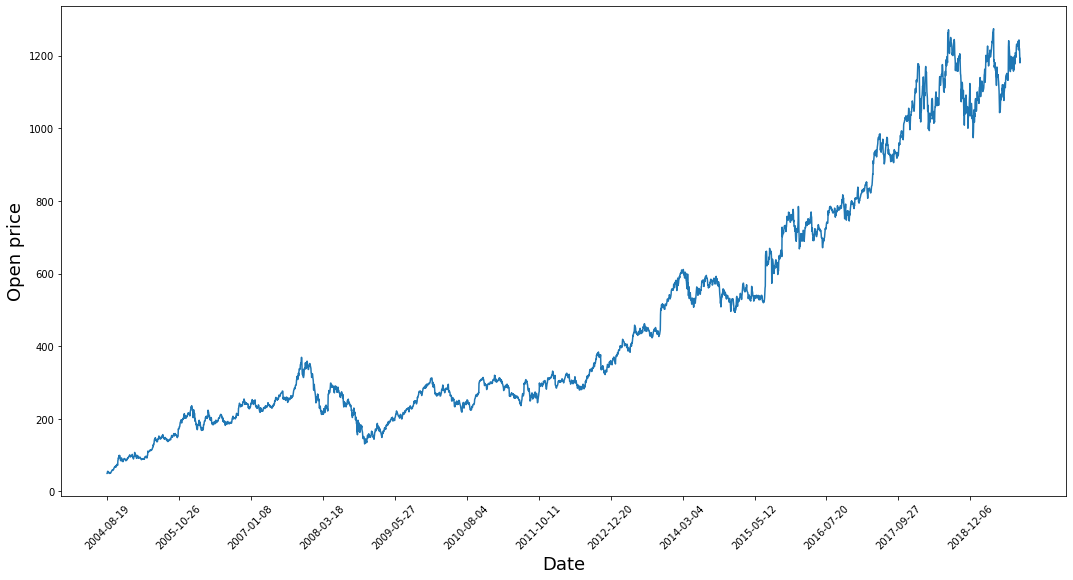

Epoch 1/50
112/112 [==============================] - 10s 87ms/step - loss: 0.0151
Epoch 2/50
112/112 [==============================] - 10s 89ms/step - loss: 0.0019
Epoch 3/50
112/112 [==============================] - 10s 89ms/step - loss: 0.0019
Epoch 4/50
112/112 [==============================] - 10s 90ms/step - loss: 0.0018
Epoch 5/50
112/112 [==============================] - 10s 90ms/step - loss: 0.0013
Epoch 6/50
112/112 [==============================] - 10s 90ms/step - loss: 0.0015
Epoch 7/50
112/112 [==============================] - 10s 89ms/step - loss: 0.0015
Epoch 8/50
112/112 [==============================] - 10s 90ms/step - loss: 0.0013
Epoch 9/50
112/112 [==============================] - 10s 90ms/step - loss: 0.0012
Epoch 10/50
112/112 [==============================] - 10s 90ms/step - loss: 0.0010
Epoch 11/50
112/112 [==============================] - 10s 90ms/step - loss: 9.9319e-04
Epoch 12/50
112/112 [==============================] - 10s 90ms/step - loss: 0.00

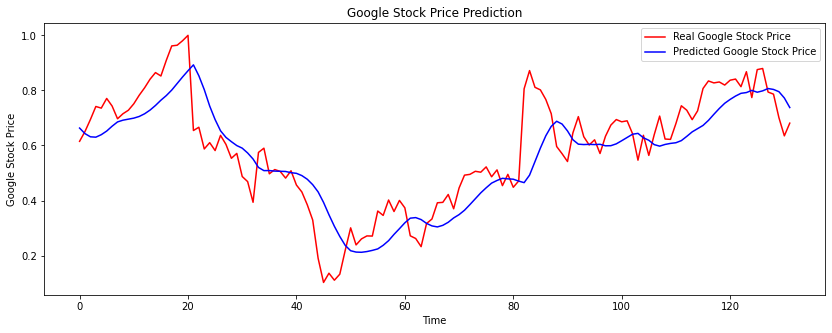

In [0]:
data = pd.read_csv('google_stock_data.csv', date_parser = True)
data.tail()

# Visualize the opening price trends for respective dates

import matplotlib.pyplot as plt
plt.figure(figsize = (18,9))
plt.plot(range(data.shape[0]),(data['Open']))
plt.xticks(range(0,data.shape[0],300),data['Date'].loc[::300],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Open price',fontsize=18)
plt.show()

#Split the data into training and testing set and drop other columns

data_training = data[data['Date']<'2019-01-01'].copy()
data_testing = data[data['Date']>='2019-01-01'].copy()
data_training = data_training.drop(['Date', 'Adj Close', 'High', 'Low', 'Close', 'Volume'], axis = 1)
data_testing = data_testing.drop(['Date', 'Adj Close', 'High', 'Low', 'Close', 'Volume'], axis = 1)

# Scale your data values between range [0-1] using MinMaxScaler 

scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_testing = scaler.fit_transform(data_testing)

#Prepare your training set for 60 time steps i.e use 60 previous opening prices to predict next days price. You are encouraged to try with different time steps, we have tested with many time steps and found this to be optimal for this dataset. 

X_train = []
y_train = []

for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])

#Prepare input tensors  for feeding your model using numpy
X_train, y_train = np.array(X_train), np.array(y_train)


#Similarly prepare your test dataset

X_test = []
y_test = []

for i in range(60, data_testing.shape[0]):
    X_test.append(data_testing[i-60:i])
    y_test.append(data_testing[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)




#### Build your LSTM model
 
model = Sequential()
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

#compile and train your model

model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)



#### Prediction 

y_pred = model.predict(X_test)
predicted_stock = scaler.inverse_transform(y_pred)


#### Visualization

plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
